## Mounting the google drive and loading requried libraries

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## Various ways of reading images

In [21]:
ls

 2018101005.gdoc
'5 mC(00) KRO2 A2920.81 (1).pdf'
'5 mC(00) KRO2 A2920.81.pdf'
 amanclass.drawio
 AmanSubmit.gdoc
 AmanSubmit.gsheet
'atola StalAls o (1).pdf'
'atola StalAls o.pdf'
 class10_sstn2.pdf
 classmate-1.pdf
 classmate.pdf
 ClassTanmay.drawio
'Colab Notebooks'/
'Copy of CVITDay1NoteBook1'
'Copy of Test Plan Document.gsheet'
 data.pkl
'Document from Aman Goel.pdf'
 DontSubmitShare.gdoc
'E type)  Obese 0-1.pdf'
'E type)  Obese 0.pdf'
 File_002.txt
 File_003.txt
 foo.txt
 Fx_test.pkl
'iKON - ‘사랑을 했다 (LOVE SCENARIO)’ DANCE PRACTICE VIDEO.mp3'
 image1.jpeg
 image.jpeg
'Image Processing'/
 IMG_20180216_140017.jpg
 IMG_20180216_140024.jpg
 IMG_20180216_140039.jpg
 IMG_20180216_140053.jpg
 IMG_20180216_140057.jpg
 IMG_20180216_140104.jpg
 IMG_20180216_140111.jpg
 IMG_20180216_140120.jpg
 IMG_20180216_140143.jpg
 IMG_20180216_140151.jpg
 IMG_20180216_140155.jpg
 IMG_20180216_140205.jpg
 IMG_20180216_140211.jpg
 IMG_20180216_140228.jpg
 IMG_20180216_140232.jpg
 IMG_20180216_1402

In [22]:
cd Image Processing

/content/drive/My Drive/Image Processing


(500, 800, 3)


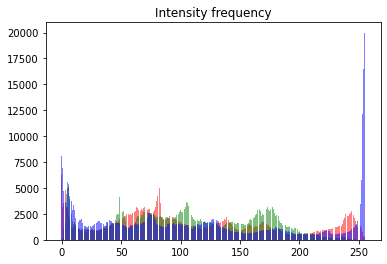

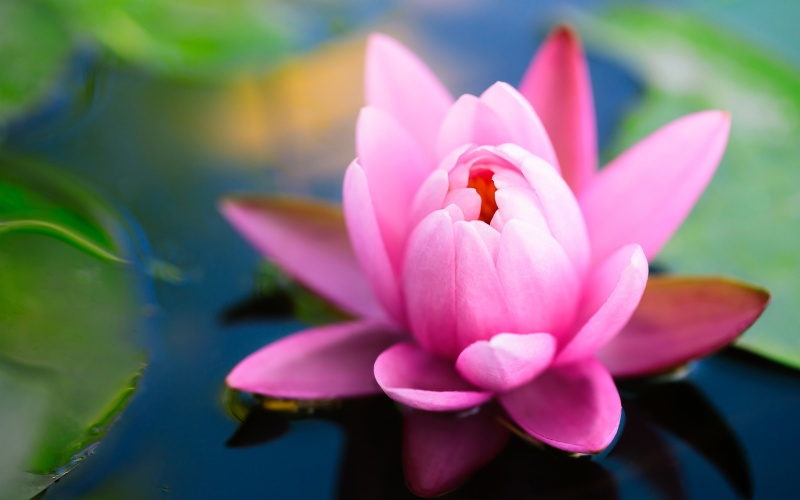

In [28]:
# Q1 Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. All RGB channels should be plotted in the same curve. Create a function for this so that it can be used later also.
I = cv2.imread('./lotus.jpg')

l=[]
for i in range(256):
  l.append(0)

for i in I:
  for j in i:
    l[j[0]]+=1

m=[]
for i in range(256):
  m.append(0)

for i in I:
  for j in i:
    m[j[1]]+=1

n=[]
for i in range(256):
  n.append(0)

for i in I:
  for j in i:
    n[j[2]]+=1

k=[]
for i in range(256):
  k.append(i)
plt.bar(k,l,color="red",alpha=0.5)
plt.bar(k,m,color="green",alpha=0.5)
plt.bar(k,n,color="blue",alpha=0.5)

plt.title("Intensity frequency")

print (I.shape)
plt.show()
cv2_imshow(I)

In [26]:
def return_histogram(I):
  if (len(I.shape) == 2 or I.shape[2] == 1):
    counts,bins = np.histogram(I.ravel(),256,[0,256])
    bins = 0.5 * (bins[:-1] + bins[1:])
    fig = px.bar(x=bins, y=counts, labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
  elif (I.shape[2] == 3):
    # Complete this part for RGB images.
    #histogram
    I=I.flatten()
    # a,b,c=I.shape
    array = np.zeros(256)
    array2 = np.zeros(256)
    for i in range(255):
      array[i]=i+0.5
    for i in I:
      a=int(i)
      array2[a]=array2[a]+1
    fig = px.bar(x=array, y=array2,labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
    # fig.show()
    pass
  return fig

I=cv2.imread('./window.jpeg')
print(I.shape)
fig=return_histogram(I)
I_lena_bw = cv2.imread('./gamma1.jpg', cv2.IMREAD_GRAYSCALE)
fig=return_histogram(I_lena_bw)
fig.show()

(750, 500, 3)


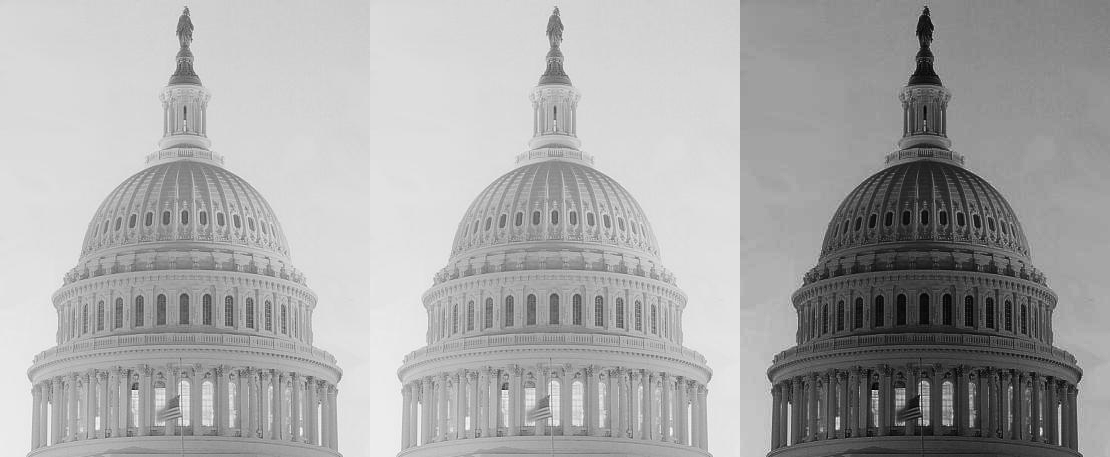

In [0]:

# Q2 Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1.
I_lena_bw = cv2.imread('./gamma1.jpg', cv2.IMREAD_GRAYSCALE)
I=I_lena_bw.astype('int')
I=I/255
I1=I**0.9
I2=I**3
I1=I1*255
I2=I2*255
I=I*255
I1=np.clip((I1),0,255).astype('uint8')
I2=np.clip((I2),0,255).astype('uint8')
cv2_imshow(np.hstack([I,I1,I2]))

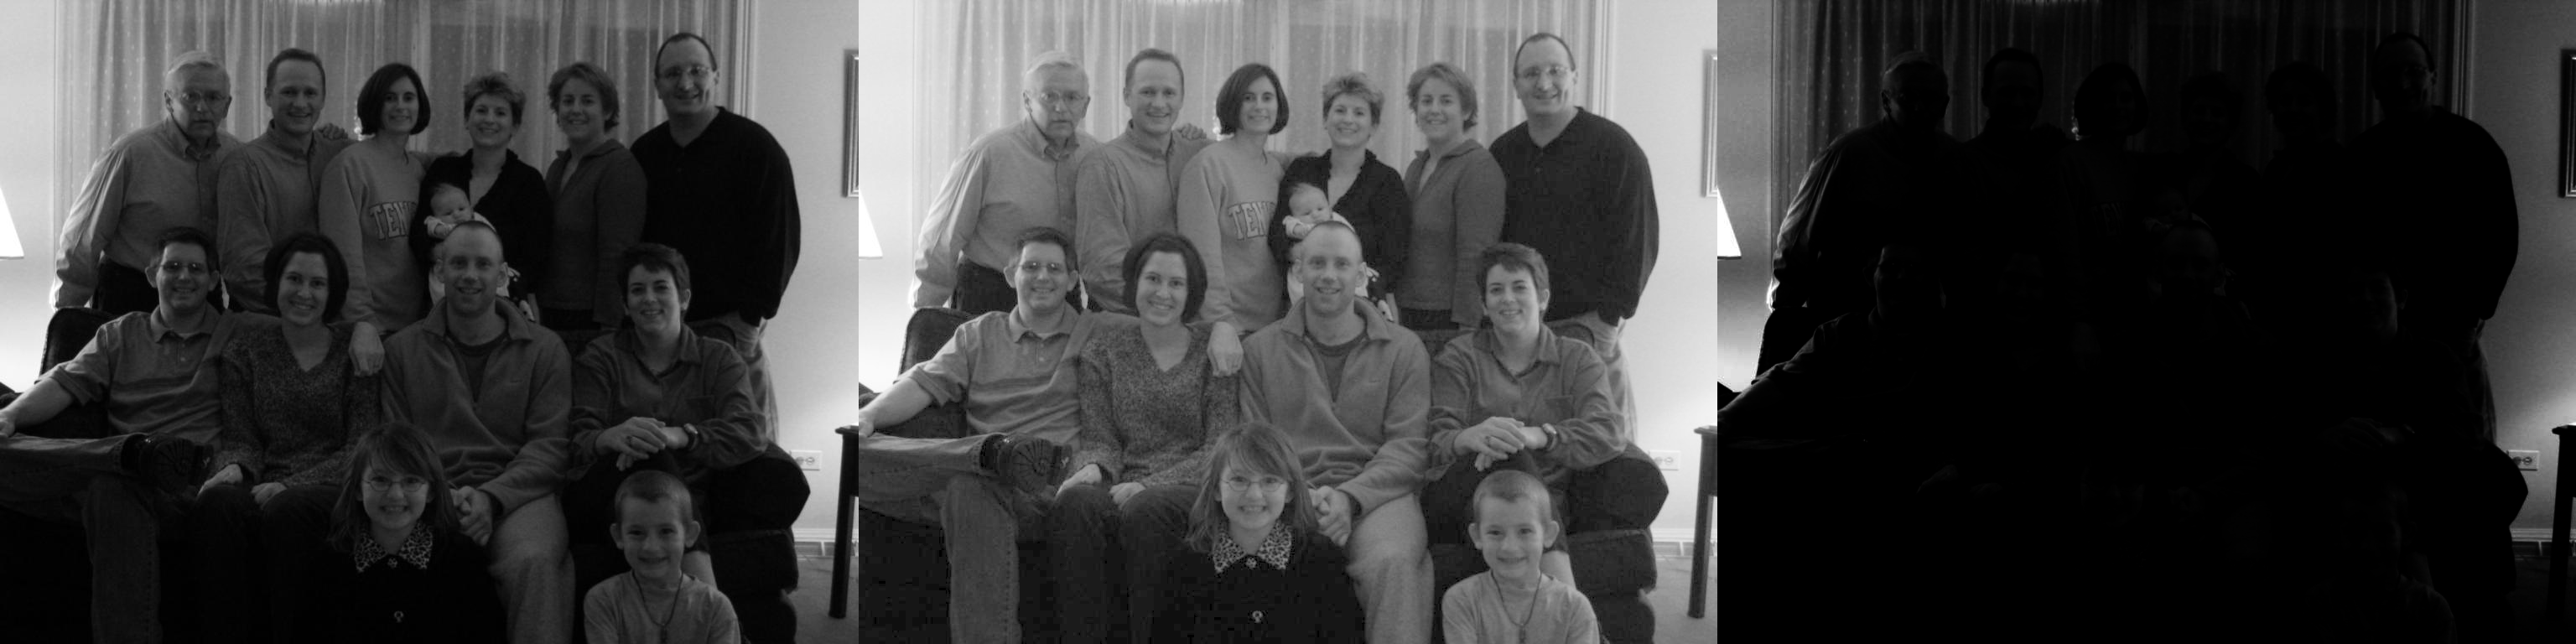

In [0]:

# Q2 Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1.
I_lena_bw = cv2.imread('./gamma2.jpg', cv2.IMREAD_GRAYSCALE)
I=I_lena_bw.astype('int')
I=I/255
I1=I**0.5
I2=I**3.5
I1=I1*255
I2=I2*255
I=I*255
I1=np.clip((I1),0,255).astype('uint8')
I2=np.clip((I2),0,255).astype('uint8')
cv2_imshow(np.hstack([I,I1,I2]))

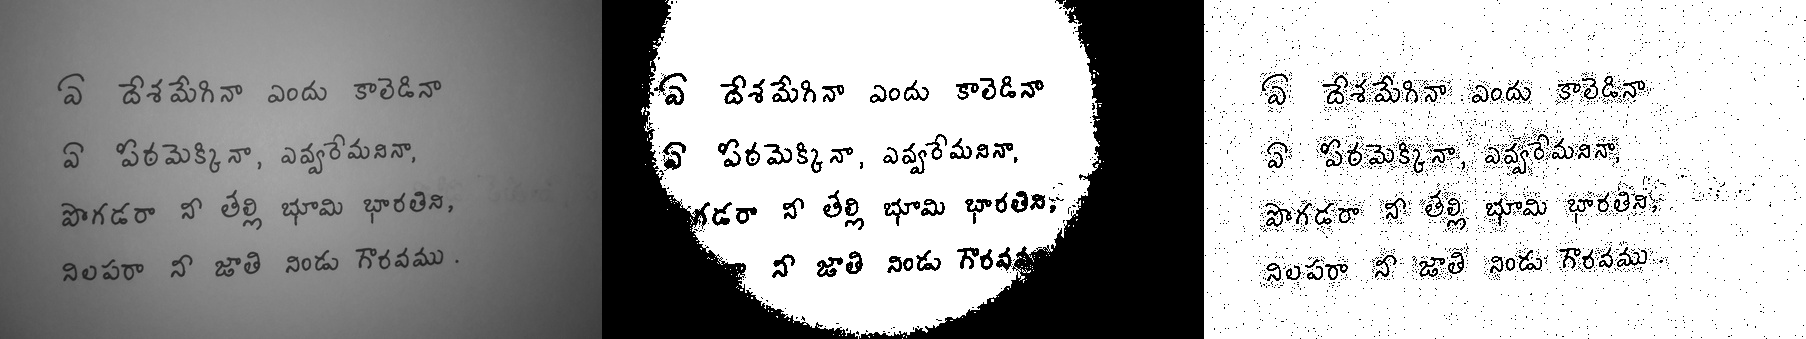

In [0]:
#Q3 Perform thresholding on the image ‘text.jpg’
I = cv2.imread('./text.jpg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show()
ret,thresh1 = cv2.threshold(I,120,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
cv2_imshow(np.hstack([I, thresh1, thresh2]))

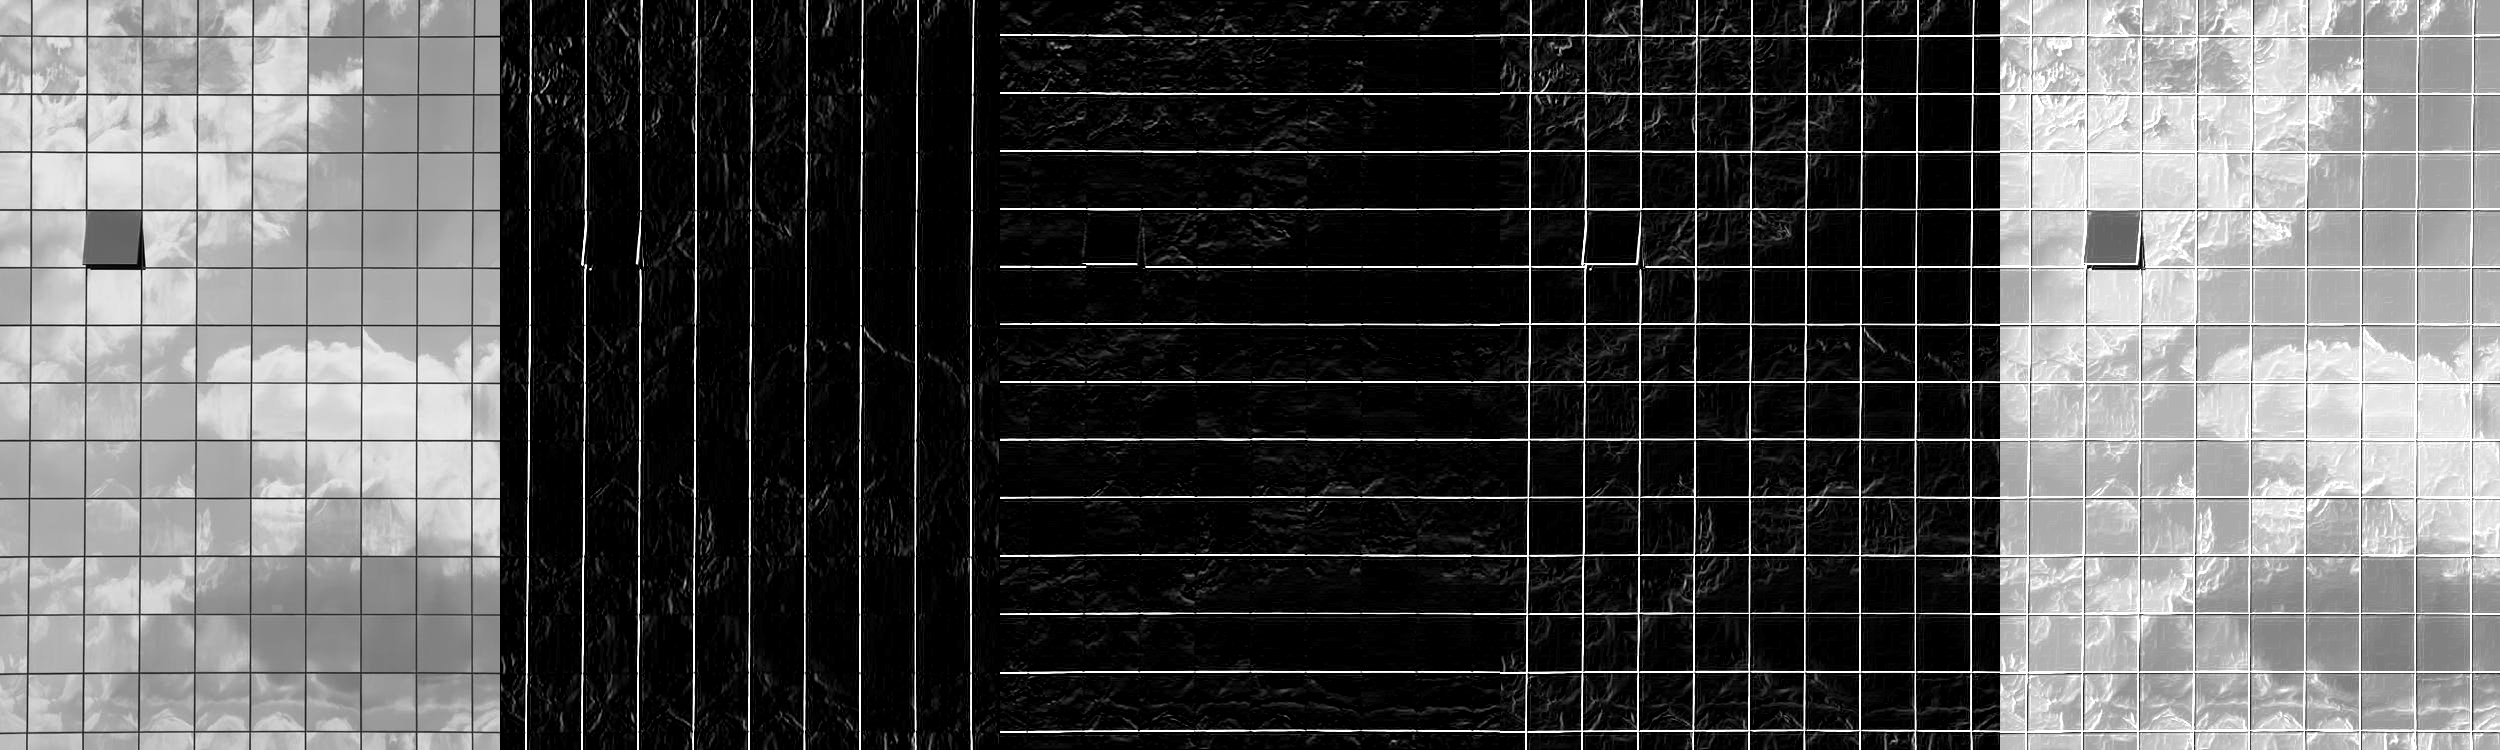

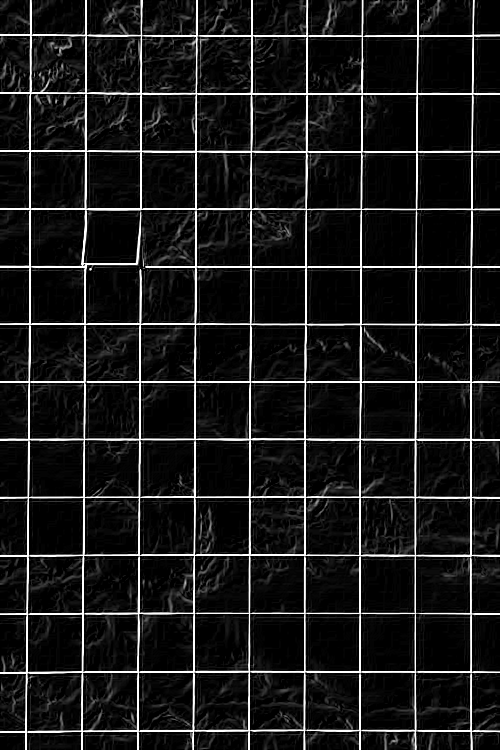

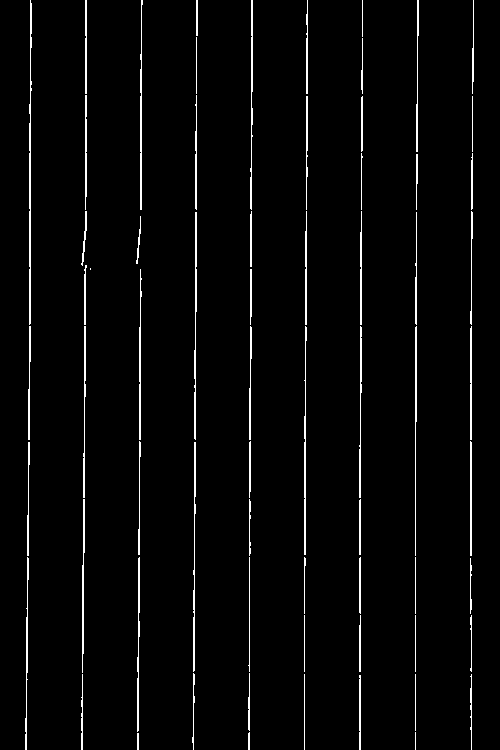

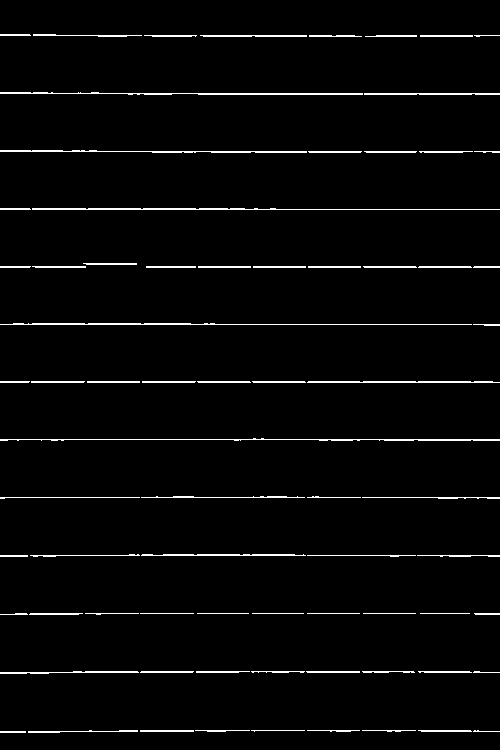

9
13
Number of windows are 140


In [25]:
# Q4 Count the number of windows in image 'window.jpeg' using edge detection filters.

I= cv2.imread('./window.jpeg',cv2.IMREAD_GRAYSCALE)
sobel_x= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filtered_image1= cv2.filter2D(I,-1,sobel_x)
filtered_image2= cv2.filter2D(I,-1,sobel_y)
magnitude = np.sqrt(np.square(filtered_image1.astype('int'))+np.square(filtered_image2.astype('int')))
final = np.clip((I+magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2,magnitude,final]))
cv2_imshow(magnitude)
return_histogram(filtered_image1).show()
#126 windows
a,b= filtered_image1.shape
flag=0
count=0
tick=0
I= filtered_image1
ret,thresh1 = cv2.threshold(I,230,255,cv2.THRESH_BINARY)
I = thresh1
cv2_imshow(thresh1)
count=0
I= filtered_image2
ret,thresh2 = cv2.threshold(I,230,255,cv2.THRESH_BINARY)
I = thresh1
cv2_imshow(thresh2)
count1=0
flag=0
for i in range(0,thresh1.shape[1],1):
    if(flag==0 and thresh1[30][i]>230):
      flag=1
      count1+=1
    if(flag==1 and thresh1[30][i]<40):
      flag=0
print(count1)
flag=0
count2=0
for i in range(0,thresh2.shape[0],1):
  if(flag==0 and thresh2[i][10]>230):
    flag=1
    count2+=1
  if(flag==1 and thresh2[i][10]<40):
    flag=0
print(count2)
count1+=1
count2+=1
print("Number of windows are",count1*count2)